In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataframe = pd.read_csv("Regression/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=True)

In [5]:
numeric_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = dataframe.select_dtypes(include=['object']).columns.tolist()


In [6]:
if 'Price' in numeric_cols:
    numeric_cols.remove('Price')

In [7]:
imputer_num = SimpleImputer(strategy='median')
dataframe[numeric_cols] = imputer_num.fit_transform(dataframe[numeric_cols])

In [8]:
imputer_cat = SimpleImputer(strategy='most_frequent')
dataframe[categorical_cols] = imputer_cat.fit_transform(dataframe[categorical_cols])

In [9]:
dataframe['Days'] = (dataframe['Date'] - dataframe['Date'].min()).dt.days
numeric_cols.append('Days')

In [10]:
features = [col for col in dataframe.columns if col not in ['Price', 'Address', 'Date']]
categorical_features = [col for col in features if col in categorical_cols]
numeric_features = [col for col in features if col in numeric_cols]

In [11]:
X = pd.get_dummies(dataframe[features], columns=categorical_features, drop_first=True)
y = dataframe['Price'].dropna()

In [12]:
X = X.loc[y.index]
q1 = y.quantile(0.01)
q3 = y.quantile(0.99)
y = y[(y >= q1) & (y <= q3)]
X = X.loc[y.index]

In [13]:
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
predictions = lm.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [17]:
print(f'Mean Absolute Error (MAE): {mae:,.2f}')
print(f'Mean Squared Error (MSE): {mse:,.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:,.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Absolute Error (MAE): 191,427.43
Mean Squared Error (MSE): 73,936,638,025.96
Root Mean Squared Error (RMSE): 271,912.92
R^2 Score: 0.7055


In [19]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)

print("\nTop 5 Positive and Negative Coefficients:")
top_bottom = pd.concat([coeff_df.head(5), coeff_df.tail(5)])
print(top_bottom)



Top 5 Positive and Negative Coefficients:
                     Coefficient
SellerG_Blue        8.884952e+05
SellerG_Nicholas    8.588125e+05
SellerG_Lucas       8.159811e+05
SellerG_Outlook     8.104389e+05
Suburb_Yan Yean     7.032013e+05
SellerG_Propertyau -4.294004e+05
Type_u             -4.321295e+05
SellerG_Landfield  -4.660813e+05
SellerG_Gr8        -5.963982e+05
SellerG_Justin     -1.102298e+06


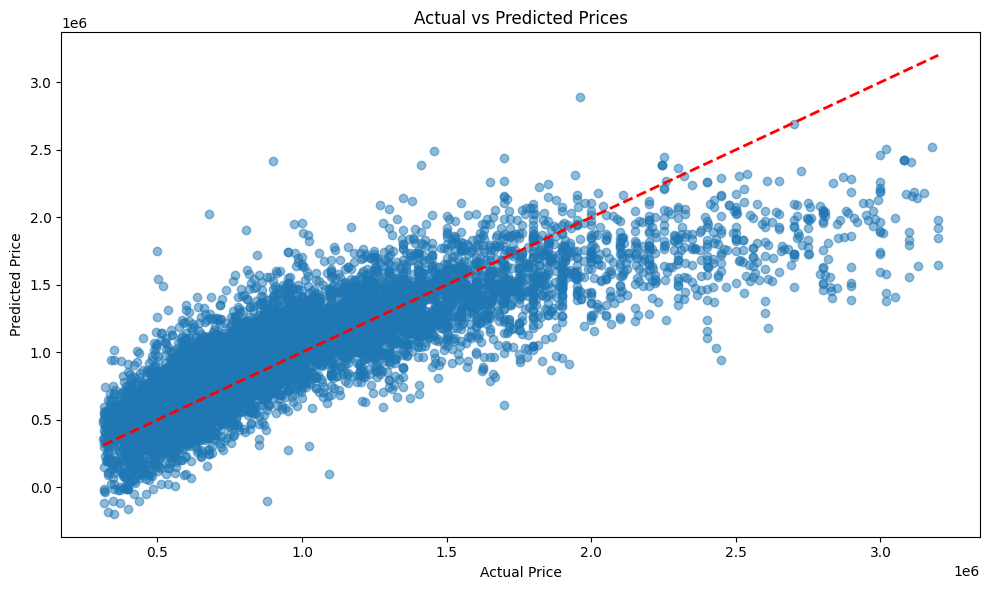

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

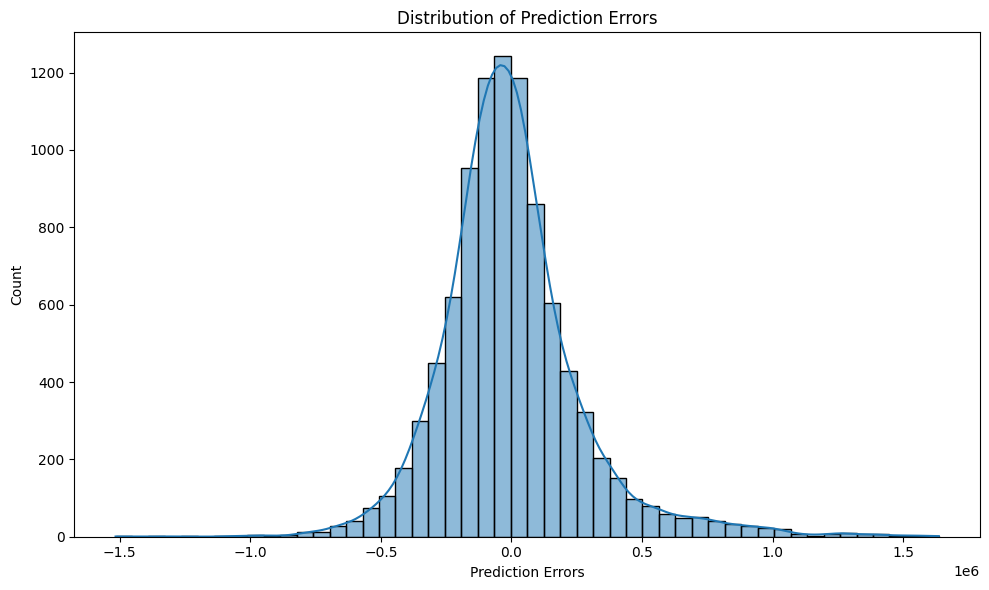

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.xlabel('Prediction Errors')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

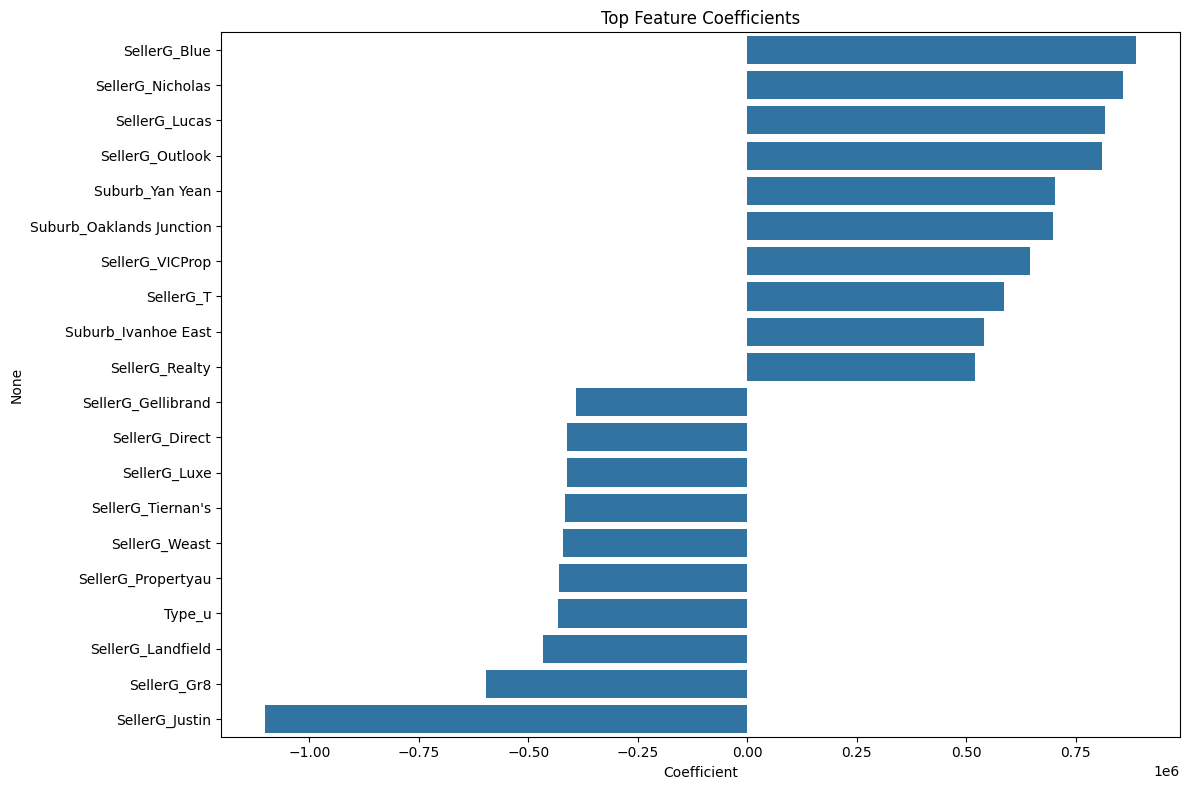

In [23]:
plt.figure(figsize=(12, 8))

# Use pd.concat instead of append
top_features = pd.concat([coeff_df.head(10), coeff_df.tail(10)])

sns.barplot(x=top_features['Coefficient'], y=top_features.index)
plt.title('Top Feature Coefficients')
plt.tight_layout()
plt.show()


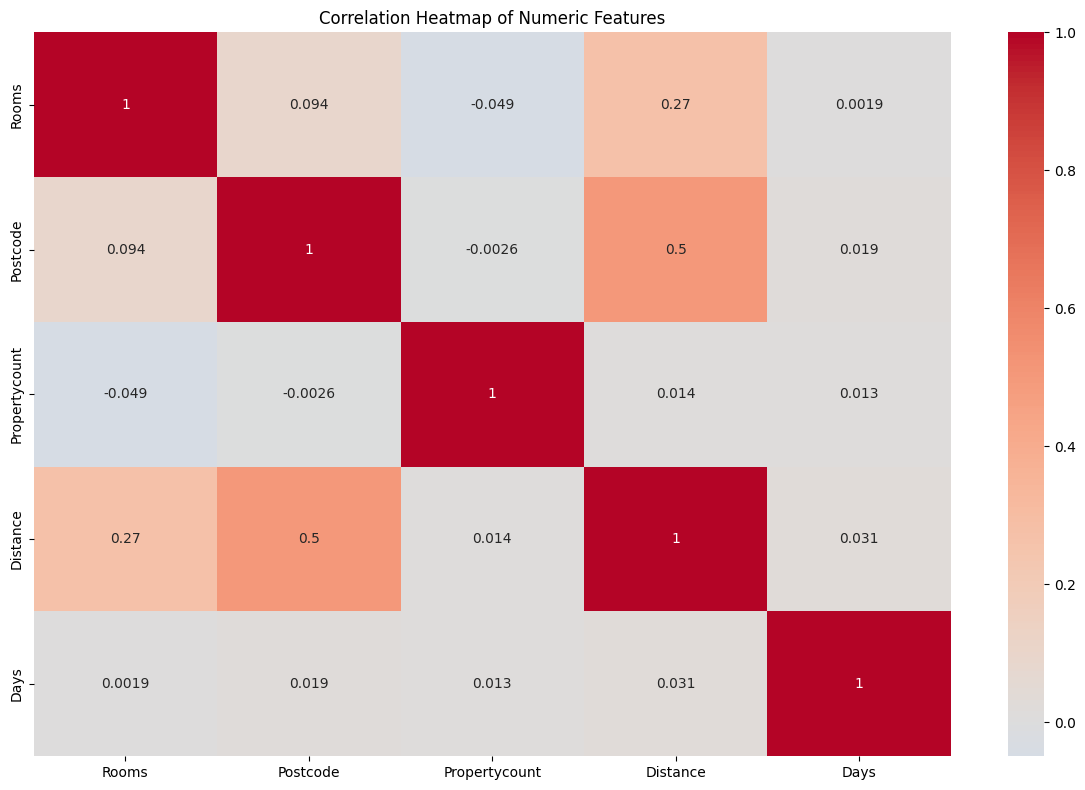

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataframe[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()